# Proyecto Spint 14 (Métodos numéricos)

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Preparación de datos

In [4]:
df = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 14/Proyecto/car_data.csv')
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [7]:
#Vamos a ver la natura de los datos, en este caso en la variable VehicleType
df['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

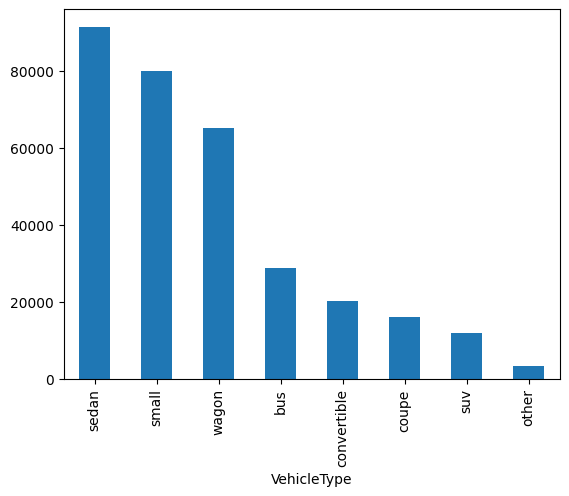

In [ ]:
#Vemos la distribución de los mismos, pare ver si hay algún tipo de modelo que predomine en el mercado
df['VehicleType'].value_counts().plot(kind='bar')
plt.show()


**El tipo de autos más demandados dan una idea del rango de precios dentro del mercado.**

Habiendo analizado esta variable, proceso a hacer la conversión a variable categórica para su posterior análisis dentro de la construcción de los modelos correspondientes.

In [9]:
df['VehicleType'] = df['VehicleType'].fillna('other')

var_dummy0 = pd.get_dummies(df['VehicleType'], prefix='VehicleType', drop_first=True)
df = pd.concat([df, var_dummy0], axis=1)

**Como la caja de transmisión entra en juego en términos de la conducta del consumidor, y por ende, se ve reflejado directamente en el comportamiento del mercado, procedo a hacer el mismo proceso de conversión, en términos de la variable GearBox**

In [10]:
df['Gearbox'] = df['Gearbox'].fillna('other')
var_dummy1 = pd.get_dummies(df['Gearbox'], prefix='Gearbox', drop_first=True)
df = pd.concat([df, var_dummy1], axis=1)

**Procedemos a hacer lo mismo en relación a la variable registration month**

In [12]:
df['RegistrationMonth'].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

In [13]:
#Convertimos la variable RegistrationMonth a categórica
df['RegistrationMonth'] = df['RegistrationMonth'].fillna('other')
var_dummy2 = pd.get_dummies(df['RegistrationMonth'], prefix='RegistrationMonth', drop_first=True)
df = pd.concat([df, var_dummy2], axis=1)

**Ahora reptimos para la variable que especifica el tipo de combustible**

In [14]:
df['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [15]:
#Convertimos la variable FuelType a categórica:
df['FuelType'] = df['FuelType'].fillna('other')
var_dummy3 = pd.get_dummies(df['FuelType'], prefix='FuelType', drop_first=True)
df = pd.concat([df, var_dummy3], axis=1)


**Convertimos a variable categórica la marca**

In [16]:
df['Brand'] = df['Brand'].fillna('other')
var_dummy4 = pd.get_dummies(df['Brand'], prefix='Brand', drop_first=True)
df = pd.concat([df, var_dummy4], axis=1)

Hacemos lo mismo en términos de reparación del auto

In [18]:
df['NotRepaired'] = df['NotRepaired'].fillna('other')
var_dummy5 = pd.get_dummies(df['NotRepaired'], prefix='NotRepaired', drop_first=True)
df = pd.concat([df, var_dummy5], axis=1)

#### Distribución de la variable marca, para analizar las preferencias de consumo

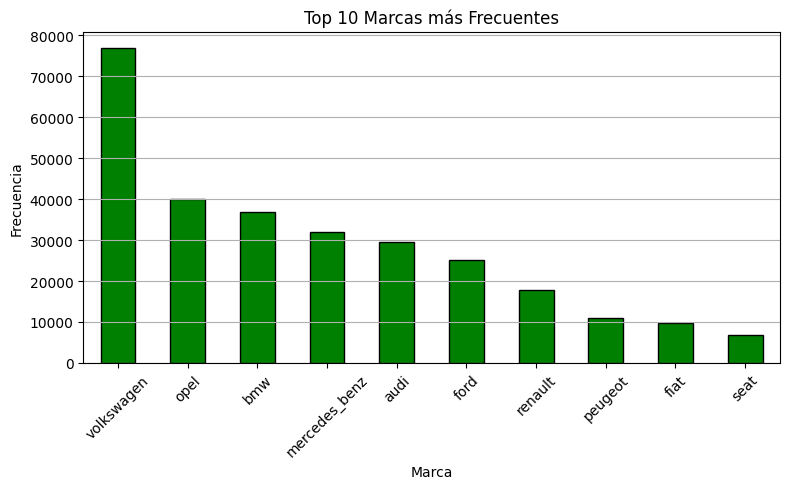

In [ ]:

frecuencias = df['Brand'].value_counts()
#Construímos el filtro para ver el compartamiento de las marcas
top_n = 10
marcas_top = frecuencias.nlargest(top_n)

# Grafico
plt.figure(figsize=(8, 5))
marcas_top.plot(kind='bar', color='green', edgecolor='black')
plt.title(f'Top {top_n} Marcas más Frecuentes')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Podemos ver que la marca lider es Volkswagen. Al mismo tiempo el comportamiento del consumidor se inclina fuertemente hacia la producción automotriz alemana.**

**Estosa datos son importantes, ya que la empresa busca trabajar directamente con el precio de mercado del auto, al tener un esbozo del consumo dentro del mercado, este puede derivarse en caracreristicas de naturaleza cualitativa, como calidad en términos mecánicos, comodidad, diseño de las unidades, durabilidad, etc.**


In [21]:
#Vamos creando un df secundario, donde solo estén presentes las variables que nos interesan para el modelo:

df_model = df.copy()

var_delete = ['VehicleType', 'Gearbox', 'RegistrationMonth', 'FuelType', 'Brand', ' Model', 'DateCrawled','DateCreated', 'PostalCode', 'LastSeen']

df_model = df_model.drop(columns=[var for var in var_delete if var in df_model.columns])

## Entrenamiento del modelo 

a) **Regresión lineal**

RMSE: 4268.846002310632
R2: 0.1197762496774949
MAE: 3145.6544672226937


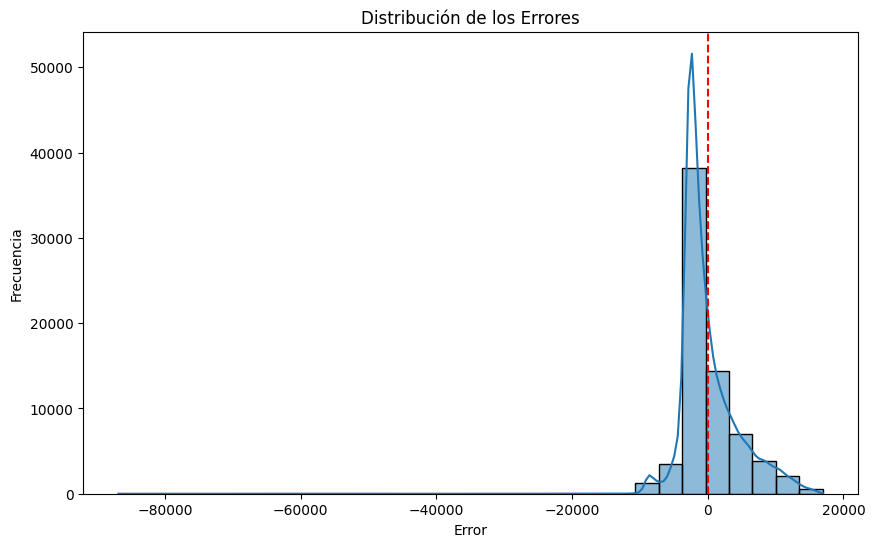

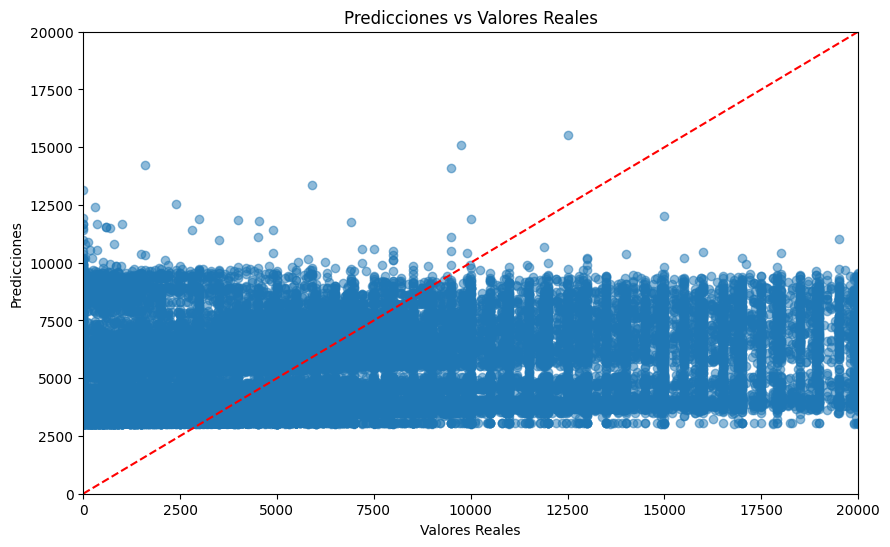

In [24]:
X = df_model.drop(columns=['Price'])
y = df_model['Price']

#Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Estandarizamos las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

#Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Hacemos las predicciones
y_pred = model.predict(X_test_scaled)

#Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'MAE: {mae}')
#Visualizamos la distribución de los errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribución de los Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--')
plt.show()

#Visualizamos la relación entre las predicciones y los valores reales
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()


**b) Análisis usando bosque aleatorio**

RMSE (Random Forest): 2216.9432088668286
R2 (Random Forest): 0.7625997114128039
MAE (Random Forest): 1395.0828565731586


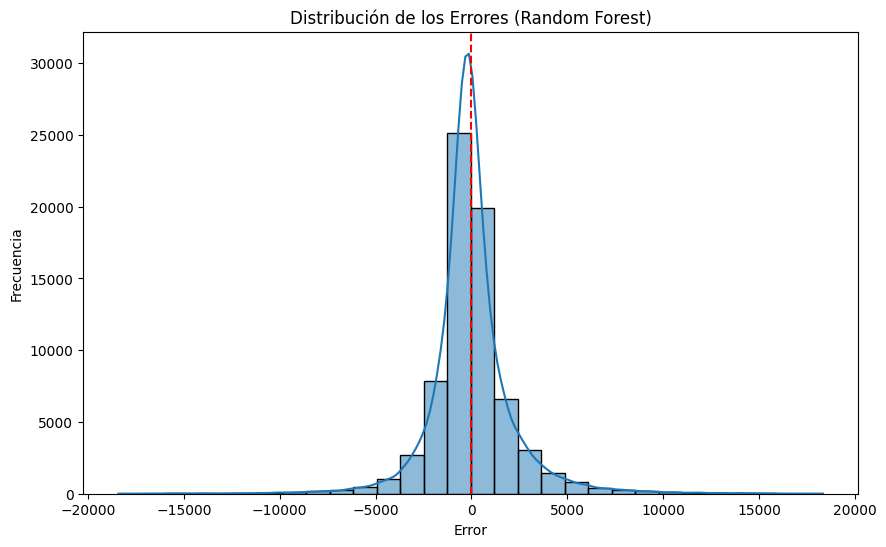

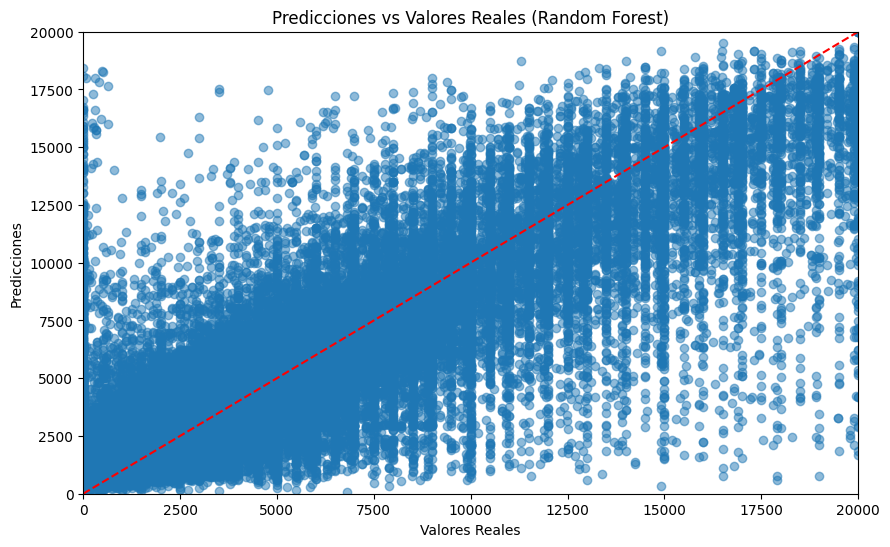

Comparación de Modelos:
Linear Regression - RMSE: 4268.846002310632, R2: 0.1197762496774949, MAE: 3145.6544672226937
Random Forest - RMSE: 2216.9432088668286, R2: 0.7625997114128039, MAE: 1395.0828565731586


In [26]:
#Ahora vamos a usar el modelo con bosque aleatorio para evaluar si mejora el rendimiento

#Creamos el modelo de bosque aleatorio
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Entrenamos el modelo
rf_model.fit(X_train_scaled, y_train)
#Hacemos las predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

#Evaluamos el modelo de bosque aleatorio

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'RMSE (Random Forest): {rmse_rf}')
print(f'R2 (Random Forest): {r2_rf}')
print(f'MAE (Random Forest): {mae_rf}')
#Visualizamos la distribución de los errores del modelo de bosque aleatorio

errors_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(errors_rf, bins=30, kde=True)
plt.title('Distribución de los Errores (Random Forest)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--')
plt.show()

#Visualizamos la relación entre las predicciones y los valores reales del modelo de bosque aleatorio
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()

#Comparación de los modelos
print(f'Comparación de Modelos:')
print(f'Linear Regression - RMSE: {rmse}, R2: {r2}, MAE: {mae}')
print(f'Random Forest - RMSE: {rmse_rf}, R2: {r2_rf}, MAE: {mae_rf}')


**c) Análisis usando potenciación del gradiente (Gradiente Boosting)**

RMSE (Gradient Boosting): 2288.5255804952944
R2 (Gradient Boosting): 0.747021479129081
MAE (Gradient Boosting): 1488.0919909119677


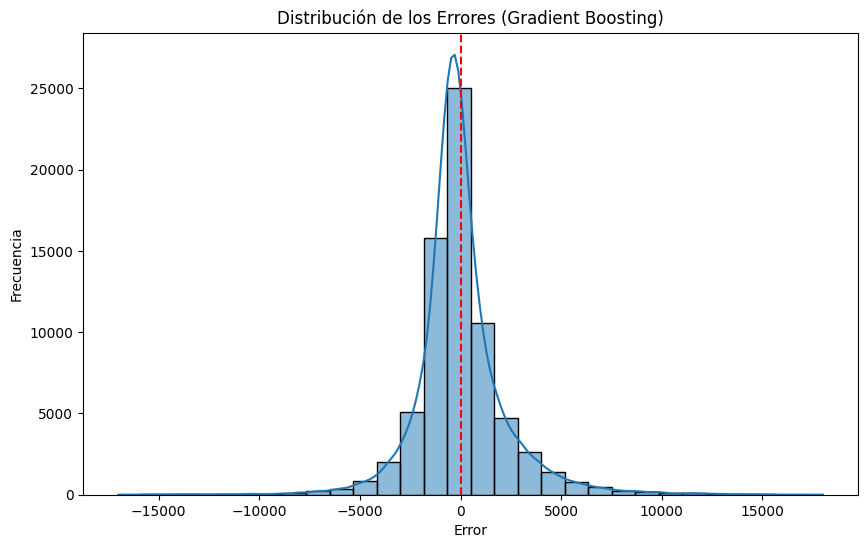

Comparación acumulada de los modelos:
Regresión lineal - RMSE: 4268.846002310632, R2: 0.1197762496774949, MAE: 3145.6544672226937
Random Forest - RMSE: 2216.9432088668286, R2: 0.7625997114128039, MAE: 1395.0828565731586
Gradient Boosting - RMSE: 2288.5255804952944, R2: 0.747021479129081, MAE: 1488.0919909119677


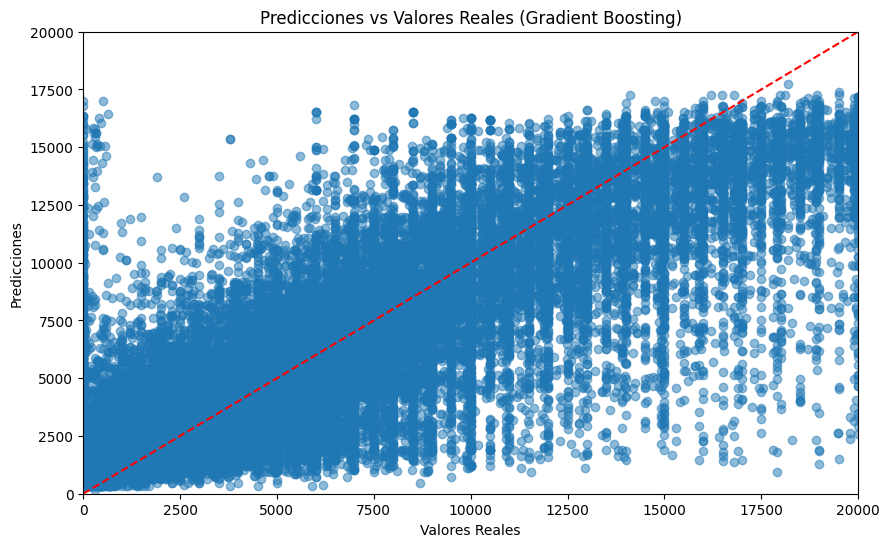

In [31]:
#Ahora , por ultimo, vamos a analizar usando la potenciación del gradiente para ver si podemos mejorar el modelo



#Creamos el modelo de potenciación del gradiente
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.04 ,max_depth=4,min_samples_split=11, min_samples_leaf=3,subsample=0.2,random_state=42)

#Entrenamos el modelo
gb_model.fit(X_train_scaled, y_train)

#Hacemos las predicciones
y_pred_gb = gb_model.predict(X_test_scaled)

#Evaluamos el modelo de potenciación del gradiente
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f'RMSE (Gradient Boosting): {rmse_gb}')
print(f'R2 (Gradient Boosting): {r2_gb}')
print(f'MAE (Gradient Boosting): {mae_gb}')

#Visualizamos la distribución de los errores del modelo de potenciación del gradiente
errors_gb = y_test - y_pred_gb
plt.figure(figsize=(10, 6))
sns.histplot(errors_gb, bins=30, kde=True)
plt.title('Distribución de los Errores (Gradient Boosting)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--')
plt.show()

#Visualizamos la relación entre las predicciones y los valores reales del modelo de potenciación del gradiente
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales (Gradient Boosting)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

#Comparación de los modelos
print(f'Comparación acumulada de los modelos:')
print(f'Regresión lineal - RMSE: {rmse}, R2: {r2}, MAE: {mae}')
print(f'Random Forest - RMSE: {rmse_rf}, R2: {r2_rf}, MAE: {mae_rf}')
print(f'Gradient Boosting - RMSE: {rmse_gb}, R2: {r2_gb}, MAE: {mae_gb}')
plt.show()


## Análisis del modelo

En este proyecto propuse el análisis por medio de 3 técninas, para contrastar el desempeño de los mismos y a partir de ese mismo análisis ofrecer un modelo analítico para el problema que se plantea. 

 - En cuanto al desempeño, podemos decir que el modelo de regresión lineal, en este sentido tiene muy poco poder explicativo, segpun el R cuadrada, este explica menos del 12% del modelo, este fenómeno lo podemos constatar de manera gráfica en su gráfico de dispersión, ya que los datos no siguen una tendencia lineal. En este sentido el RMSE es muy grande y en MAE tenemos una desviación de 3,145 unidades.

- El random forest tiene un desempeño muy bueno, ya que explica un 76.26%, el MAE es mucho menor que en la regresión lineal, esto nos deja ver la confiabilidad del modelo. **En términos escrictos, este modelo es el que tiene un mejor desempeño.**

- En términos del modelo Gradient Boost, y teniendo en cuenta la parte teórica que nos indica que este modelo tiene una tendencia al la flexibilidad en términos de hiperparámetros, hice una descripción más extensiva en este sentido, y a base de ensayos, llegué a un 74.70% de poder explicativo. Es importante destacar que en ensayos pasados tenía un desempeño menos eficiente del modelo, hecho que da un reforzamiento a la parte teórica en donde se busca que el gradiente aprenda el patrón de los datos direccionando a su máxima expresión el descenso del error.

Como conslusión, podemos decir que el algoritmo de Gradient Boosting es una forma muy fuerte de plantear soluciones confiables, ya que por naturaleza, al utilizar estya técnica se van corrigiendo los modelos anteriores, en términos de errores, de manera secuencial.

**Este proyecto lo ofrezco como antecedente a la aplicación y versatilidad que tiene la ciencia de datos con la teoría y la lógica económica, ya que, en el principio del proyecto comencé acentuando el comportamiento del mercado, y concluyó con el desarrollo de algoritmos propios de la ciencia de datos**
